            gx        gy        gz     ax     ay     az
0    -0.589232 -0.206970 -0.309588 -0.232 -1.196 -0.414
1    -0.610532 -0.105769 -0.330893 -0.134 -1.270 -0.430
2    -0.498682 -0.015222 -0.325567 -0.050 -1.330 -0.434
3    -0.370848  0.144568 -0.346872  0.006 -1.358 -0.422
4    -0.211058  0.155220 -0.219041  0.066 -1.360 -0.386
..         ...       ...       ...    ...    ...    ...
531  -0.322911  0.725137  0.228371  0.004 -0.846 -0.146
532  -0.349543  0.597305  0.217718  0.008 -0.912 -0.120
533  -0.429442  0.522737  0.249676 -0.008 -0.988 -0.096
534  -0.429442  0.341642  0.239023 -0.074 -1.038 -0.082
535  -0.429442  0.341642  0.239023 -0.074 -1.038 -0.082

[536 rows x 6 columns]
     FFT Coefficients  Frequency
1            0.000000   0.000000
2            6.561729   0.001866
3            4.496209   0.003731
4           12.505351   0.005597
5           12.414013   0.007463
..                ...        ...
264          0.328260   0.490672
265          0.710148   0.492537
266    

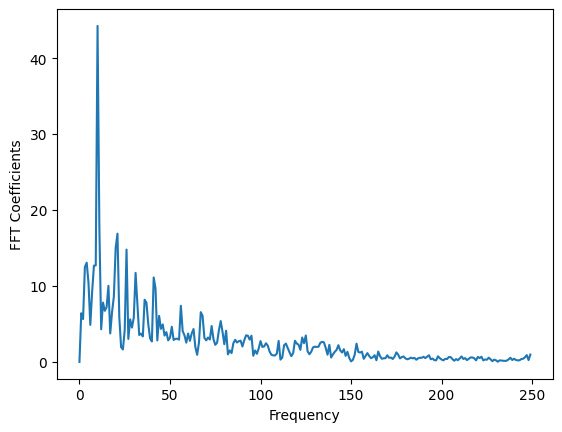

In [6]:
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


#------------------------------------------------------TRAIN MODEL------------------------------------------------------#
### Get CSV files list from a folder
##path_train = "C:/Users/DELL/Desktop/Train"
##csv_files_train = glob.glob(path_train + "/*.csv")
##path_test = "C:/Users/DELL/Desktop/Test"
##csv_files_test = glob.glob(path_test + "/*.csv")

##x_train = []
##x_test = []
##y_train = []
##y_test = []

##train_index = 1
##test_index = 1

###Generate dataframe from csv file
##def generate_df (file):
##    columns = ['gx','gy','gz','ax','ay','az']
##    selected_columns = ['gx','gy','gz','ax','ay','az']
##    df = pd.read_csv(file, sep=',', header=None, names=columns, usecols=selected_columns)
##    df = df.drop([df.index[0], df.index[1]])
##    df = df.reset_index(drop=True)
##    return df

###Fourier transform a dataframe into an array of data 
##def fourier_transform (df):
##    selected_columns = ['gx','gy','gz','ax','ay','az']

##    GX_test = []
##    GY_test = []
##    GZ_test = []
##    AX_test = []
##    AY_test = []
##    AZ_test = []

##    for column in selected_columns:
##        # Perform Fourier Transform on the 'Value' column
##        fft_vals = np.fft.fft(df[column].values)

##        #sum = 0
##        #for value in fft_vals:
##        #    sum+=np.abs(value)

##        # Get the corresponding frequencies for each FFT coefficient
##        freqs = np.fft.fftfreq(len(df), d=(df.index[1] - df.index[0]))

##        # Create a new dataframe to store the FFT coefficients and corresponding frequencies
##        fft_df = pd.DataFrame({'FFT Coefficients': np.abs(fft_vals),
##                                'Frequency': freqs})

##        # Remove the first FFT coefficient (DC offset)
##        fft_df = fft_df[fft_df['Frequency'] > 0]

##        # create a new data point as a list
##        new_data = [0, 0]

##        # insert the new data point into the DataFrame using loc[] and index label 0
##        fft_df.loc[0] = new_data
##        fft_df.index = fft_df.index + 1

##        # sort the index in ascending order
##        fft_df = fft_df.sort_index()

##        #print(fft_df)

##        # create a new frequency array with an interval of 0.001Hz
##        min_freq = 0
##        max_freq = round(fft_df['Frequency'].max(), 3)
##        new_freq = np.arange(min_freq, max_freq + 0.002, 0.002)

##        # interpolate coefficient values for new frequency data using numpy.interp()
##        new_coef = np.interp(new_freq, fft_df['Frequency'], fft_df['FFT Coefficients'])

##        # create a new dataframe with the interpolated frequency and coefficient data
##        df_new = pd.DataFrame({'FFT Coefficients': new_coef, 'Frequency': new_freq})

##        # print the new dataframe
##        #print(df_new)

##        #take the first ~100 values
##        df_new = df_new.take(slice(0, 200))

##        fft_array = df_new['FFT Coefficients'].to_numpy()
##        #print(fft_array)

##        if column == 'gx':
##            GX_train = fft_array
##        if column == 'gy':
##            GY_train = fft_array
##        if column == 'gz':
##            GZ_train = fft_array
##        if column == 'ax':
##            AX_train = fft_array
##        if column == 'ay':
##            AY_train = fft_array
##        if column == 'az':
##            AZ_train = fft_array
            
##        print('fft: ' + column + ' ' + str(train_index) )


##    # Initialize an empty list to hold the concatenated arrays
##    concatenated_array = []

##    # Loop through each array and append its elements to the concatenated array
##    for array in [GX_train, GY_train, GZ_train, AX_train, AY_train, AZ_train]:
##        for element in array:
##            concatenated_array.append(element)

##    for i in range(len(concatenated_array)):
##        if concatenated_array[i] < 0:
##            concatenated_array[i] *= -1

##    return concatenated_array



######### Take 200 sample from each file
###for file in csv_files_train:
###    df = generate_df(file)
###    df = df.head(200)

###    print('read: ' + str(train_index) + ' ' +  file)

###    concatenated_array = fourier_transform(df)
###    x_train.append(concatenated_array)
###    y_train.append(file)

###    train_index += 1

###for file in csv_files_test:
###    df = generate_df(file)
###    df = df.head(200)

###    print('read: ' + str(test_index) + ' ' +  file )

###    concatenated_array = fourier_transform(df)
###    x_test.append(concatenated_array)

###    test_index += 1


######### Take 5 random windows from each file
##window_length = 200
##num_windows = 5

##for index in range(len(csv_files_train)): 
##    df_train = generate_df(csv_files_train[index])

##    print('read: ' + str(index) + ' ' +  csv_files_train[index])

##    df_test = generate_df(csv_files_test[index])

##    print('read: ' + str(index) + ' ' +  csv_files_test[index])

##    min_length = 0

##    if(len(df_train) < len(df_test)):
##        min_length = df_train
##    else:
##        min_length = df_test

##    windows_df_train = []
##    windows_df_test = []

##    for _ in range(num_windows):
##        # Generate a random starting index within the valid range
        
##        start_index = np.random.randint(0, len(min_length) - window_length + 1)
        
##        # Select the windows using the starting index
##        window_df_train = df_train.iloc[start_index : start_index + window_length]
##        window_df_test = df_test.iloc[start_index : start_index + window_length]
        
##        # Append the windows to their respective lists
##        windows_df_train.append(window_df_train)
##        windows_df_test.append(window_df_test)

##    for window in windows_df_train:
##        concat_array = fourier_transform(window)
##        x_train.append(concat_array)
##        y_train.append(csv_files_train[index])

##    for window in windows_df_test:
##        concat_array = fourier_transform(window)
##        x_test.append(concat_array)

##    train_index = index


##y_test = y_train

##x_train = np.array(x_train)
##x_test = np.array(x_test)
##y_train = np.array(y_train)
##y_test = np.array(y_test)

###Save transformed data to .csv file for repeated uses
##np.savetxt('x_train_200.csv', x_train, delimiter=',')
##np.savetxt('x_test_200.csv', x_test, delimiter=',')
##np.savetxt('y_train.csv', y_train, delimiter=',', fmt='%s')
##np.savetxt('y_test.csv', y_test, delimiter=',', fmt='%s')


##Load data from .csv file to create model
#x_train = np.loadtxt('x_train_200.csv', delimiter=',')
#x_test = np.loadtxt('x_test_200.csv', delimiter=',')
#y_train = np.loadtxt('y_train.csv', delimiter=',', dtype=str)
#y_test = np.loadtxt('y_test.csv', delimiter=',', dtype=str)

##Attempt to use PCA to improve the code(working on it)
#pca = PCA(n_components=100)
#x_train = pca.fit_transform(x_train)
#x_test = pca.transform(x_test)

#np.savetxt('x_train_PCA.csv', x_train, delimiter=',')
#np.savetxt('x_test_PCA.csv', x_test, delimiter=',')



#####Build the model using SVM
#from sklearn import svm
#from sklearn.metrics import accuracy_score

## create an instance of svm classifier with a linear kernel
#clf = svm.SVC(kernel='linear')

## fit the svm classifier on the training data
#clf.fit(x_train, y_train)

## use the svm classifier to predict the labels of the testing data
#y_pred = clf.predict(x_test)

## compute the accuracy of the svm classifier on the testing data
#accuracy = accuracy_score(y_test, y_pred)

## print the accuracy of the svm classifier
#print("accuracy:", accuracy)

#print("end")

#######Build the model using Random Forest
##from sklearn.ensemble import RandomForestClassifier
##from sklearn.metrics import accuracy_score

### Create a Random Forest classifier
##clf = RandomForestClassifier(n_estimators=1000, random_state=0)

### Train the classifier
##clf.fit(x_train, y_train)

### Make predictions on the test set
##y_pred = clf.predict(x_test)

### Calculate the accuracy score
##accuracy = accuracy_score(y_test, y_pred)
##print("Accuracy:", accuracy)

##print("end")


#------------------------------------------------------TEST GRAPH------------------------------------------------------#
import pandas as pd
import numpy as np

#set column name
columns = ['gx','gy','gz','ax','ay','az']
selected_columns = ['gx','gy','gz','ax','ay','az']
df = pd.read_csv('C:/Users/Son/Desktop/20232/Đồ án thiết kế KTMT/MLDM-Project/AutomaticExtractionData_IMUZCenter/T0_ID000104_Center_seq0.csv', sep=',', header=None, names=columns, usecols=selected_columns)
df = df.drop([df.index[0], df.index[1]])
df = df.reset_index(drop=True)

print(df) 

# Perform Fourier Transform on the 'Value' column
fft_vals = np.fft.fft(df['gx'].values)

#sum = 0
#for value in fft_vals:
#    sum+=np.abs(value)

# Get the corresponding frequencies for each FFT coefficient
freqs = np.fft.fftfreq(len(df), d=(df.index[1] - df.index[0]))

# Create a new dataframe to store the FFT coefficients and corresponding frequencies
fft_df = pd.DataFrame({'FFT Coefficients': np.abs(fft_vals),
                        'Frequency': freqs})

# Remove the first FFT coefficient (DC offset)
fft_df = fft_df[fft_df['Frequency'] > 0]

# create a new data point as a list
new_data = [0, 0]

# insert the new data point into the DataFrame using loc[] and index label 0
fft_df.loc[0] = new_data
fft_df.index = fft_df.index + 1

# sort the index in ascending order
fft_df = fft_df.sort_index()

print(fft_df)

# create a new frequency array with an interval of 0.001Hz
min_freq = 0
max_freq = round(fft_df['Frequency'].max(), 3)
new_freq = np.arange(min_freq, max_freq + 0.002, 0.002)

# interpolate coefficient values for new frequency data using numpy.interp()
new_coef = np.interp(new_freq, fft_df['Frequency'], fft_df['FFT Coefficients'])

# create a new dataframe with the interpolated frequency and coefficient data
new_df = pd.DataFrame({'FFT Coefficients': new_coef, 'Frequency': new_freq})

for i in range(len(new_df)):
    if new_df['FFT Coefficients'][i] < 0:
        new_df['FFT Coefficients'][i] *= -1

# print the new dataframe
print(new_df)


#create graph
import matplotlib.pyplot as plt

# convert into x and y
x = list(range(len(new_df.index)))
y = new_df['FFT Coefficients']

# plot the data
fig = plt.figure()
plt.plot(x,y)
plt.ylabel('FFT Coefficients')
plt.xlabel('Frequency')
plt.show()
